In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
v = np.loadtxt("link_bonds_10.xvg", unpack=True, comments=["#", "@", "&"])

In [5]:
v.shape

(10, 30001)

loaded v.shape = (10, 30001)
Saved plot to link_bonds_add_plot.png
Saved plot to link_bonds_add_plot.png


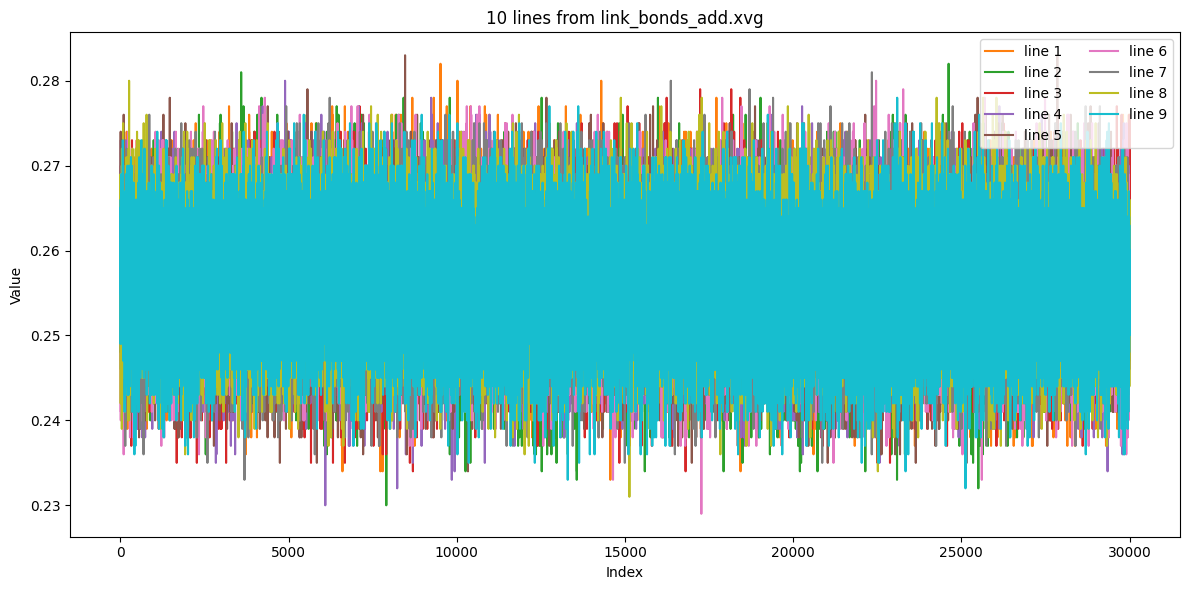

In [8]:
# Plot the 10 arrays (each should contain ~30k points)
import numpy as np
import matplotlib.pyplot as plt

# Ensure `v` exists and is an ndarray
v = np.array(v)
print('loaded v.shape =', v.shape)

# Expected: either (10, N) or (N, 10) because unpack=True was used
# Normalize to shape (10, Npoints) stored in `data`
if v.ndim == 1:
    # single 1D array - try to reshape into 10 rows if possible
    if v.size % 10 == 0:
        data = v.reshape(10, -1)
    else:
        raise ValueError(f'Unexpected 1D array length: {v.size}')
elif v.ndim == 2:
    # common cases: (10, N) or (N, 10)
    if v.shape[0] == 10:
        data = v
    elif v.shape[1] == 10:
        data = v.T
    else:
        # fallback: if one axis equals 10, transpose accordingly
        if 10 in v.shape:
            idx = list(v.shape).index(10)
            if idx == 0:
                data = v
            else:
                data = v.T
        else:
            raise ValueError(f'Unexpected v.shape: {v.shape}. Need one axis to be 10.')
else:
    raise ValueError(f'Unexpected v.ndim: {v.ndim}')

# Plotting
plt.figure(figsize=(12,6))
x = np.arange(data.shape[1])
colors = plt.cm.tab10.colors
for i in range(1,data.shape[0]):
    plt.plot(x, data[i], label=f'line {i}', color=colors[i % len(colors)])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('10 lines from link_bonds_add.xvg')
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
# Save figure to workspace
out_path = 'link_bonds_add_plot.png'
plt.savefig(out_path, dpi=150)
print('Saved plot to', out_path)
plt.show()